In [1]:
from torchvision.datasets import STL10
from utils import STL10_ID
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

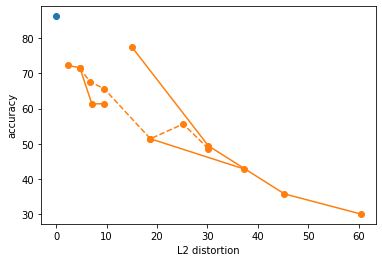

In [26]:
tab=[['stripV-0.5-96', 23.7, 66.1],
['stripV-0.5-64', 19.2, 67.2],
['stripV-0.5-32', 13.5, 62.7],
['stripV-0.5-8', 6.7, 68.4],
['stripHV-0.5-96', 30.2, 49.4],
['stripHV-0.5-64', 25.2, 42.5],
['stripHV-0.5-32', 18.7, 46.5],
['stripHV-0.5-8', 9.5, 49.3],
['stripHV-1.0-96', 60.4, 30],
['stripHV-0.75-96', 45.3, 35.7],
['stripHV-0.5-96', 30.2, 49.4],
['stripHV-0.25-96', 15.1, 77.4],
['2D-1.0', 41.7, 34.8],
['2D-0.75', 31.4, 37.6],
['2D-0.5', 21, 50.6],
['2D-0.25', 10.5, 75.4],
    ['base', 0, 86.32]]


acc = [x[-1] for x in tab]
dis = [x[-2] for x in tab]
# fig, ax = plt.subplots(1,1)
# ax.plot(dis[:4],acc[:4],'o')
# ax.plot(dis[4:12],acc[4:12],'o')
# ax.plot(dis[-5:-1],acc[-5:-1],'o')
# ax.plot(dis[-1:],acc[-1:],'o')
# plt.show()

fig, ax = plt.subplots(1,1)

ax.set_xlabel('L2 distortion')
ax.set_ylabel('accuracy')

"""
Baseline
"""
dis = [0]
acc = [86.3]
ax.plot(dis, acc, 'o',color='C0')

"""
Strip HV change power
"""
dis = [60.4,45.3,30.2,15.1]
acc = [30,35.7,49.4,77.4]
ax.plot(dis, acc, 'o-',color='C1')
dis = [9.4,7.1,4.7,2.4]
acc = [61.4,61.3,71.6,72.3]
ax.plot(dis, acc, 'o-',color='C1')
dis = [18.7,37.3]
acc = [51.4,42.8]
ax.plot(dis, acc, 'o-',color='C1')
"""
Strip HV change length
"""
dis = [30.2,25.2,18.7,9.5,6.7,4.7]
acc = [48.6,55.6,51.4,65.7,67.6,71.6]
ax.plot(dis, acc, 'o--',color='C1')

# """
# Strip V change length
# """
# dis = [23.7,19.2,13.5,6.7]
# acc = [70.9,71.2,69.7,74.4]
# ax.plot(dis, acc, 'o--',color='C2')

# """
# Strip H change length
# """
# dis = [23.4,19.2,13.3,6.6]
# acc = [79.5,77.9,69.7,72.6]
# ax.plot(dis, acc, 'o--',color='C4')

# """
# Block change power
# """
# dis = [41.7,31.4,21,10.5]
# acc = [34.8,37.6,50.6,75.4]
# ax.plot(dis, acc, 'o-',color='C3')

plt.show()


In [2]:
def calc_distortaion(id_type='strip-h', id_weight=0.75, strip_len=64):
    ds_id = STL10_ID(root='./data', split='train+unlabeled', download=True,
             id_type=id_type,
             id_weight=id_weight,
             strip_len=strip_len)
    ds = STL10(root='./data', split='train+unlabeled')
    l2_list = []
    for (x, y), (x_id, y) in tqdm(zip(ds, ds_id)):
        x = np.asarray(x).astype(np.float32) / 255.0
        x_id = np.asarray(x_id).astype(np.float32) / 255.0
        l2 = np.sqrt(((x - x_id) ** 2).sum())
        l2_list.append(l2)
    l2 = np.mean(l2_list)
    print('L2:', l2)
    return l2

In [ ]:
calc_distortaion(id_type='strip', id_weight=0.5, strip_len=96)
calc_distortaion(id_type='strip', id_weight=0.5, strip_len=64)
calc_distortaion(id_type='strip', id_weight=0.5, strip_len=32)
calc_distortaion(id_type='strip', id_weight=0.5, strip_len=8)

calc_distortaion(id_type='strip-hv', id_weight=1.0, strip_len=96)
calc_distortaion(id_type='strip-hv', id_weight=0.75, strip_len=96)
calc_distortaion(id_type='strip-hv', id_weight=0.5, strip_len=96)
calc_distortaion(id_type='strip-hv', id_weight=0.25, strip_len=96)

calc_distortaion(id_type='2d', id_weight=1.0, strip_len=96)
calc_distortaion(id_type='2d', id_weight=0.75, strip_len=96)
calc_distortaion(id_type='2d', id_weight=0.5, strip_len=96)
calc_distortaion(id_type='2d', id_weight=0.25, strip_len=96)

Files already downloaded and verified


105000it [00:47, 2202.17it/s]


L2: 23.70465
Files already downloaded and verified


105000it [00:49, 2100.57it/s]


L2: 19.232319
Files already downloaded and verified


105000it [00:49, 2118.24it/s]


L2: 13.476611
Files already downloaded and verified


105000it [00:49, 2108.94it/s]


L2: 6.6865
Files already downloaded and verified


105000it [01:00, 1740.71it/s]


L2: 60.23821
Files already downloaded and verified


105000it [00:59, 1772.87it/s]


L2: 45.337463
Files already downloaded and verified


105000it [00:59, 1775.84it/s]


L2: 30.22472
Files already downloaded and verified


Files already downloaded and verified


<ipython-input-16-c8ae9adeb7a6>:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1,2)


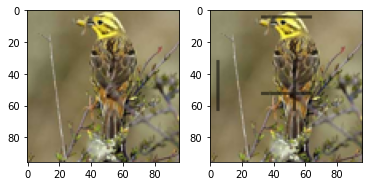

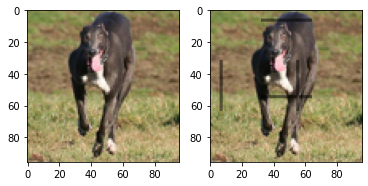

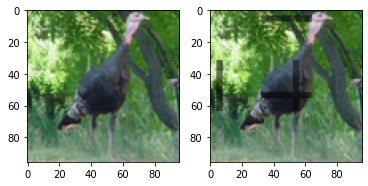

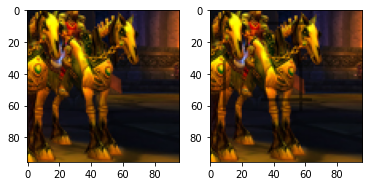

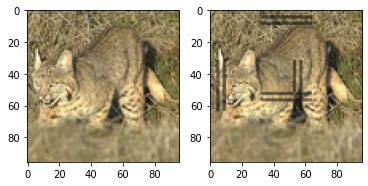

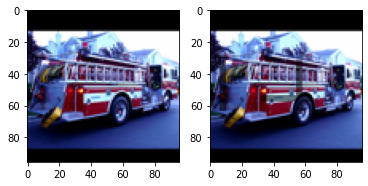

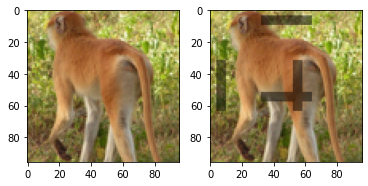

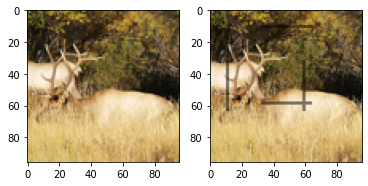

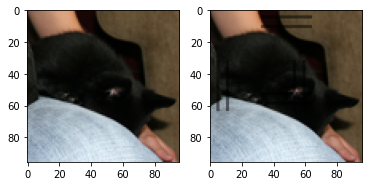

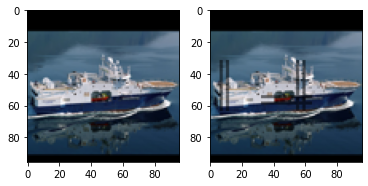

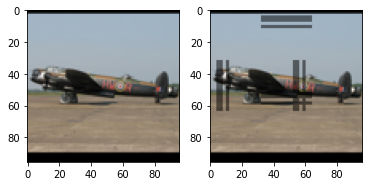

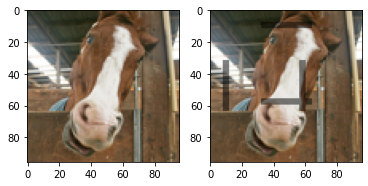

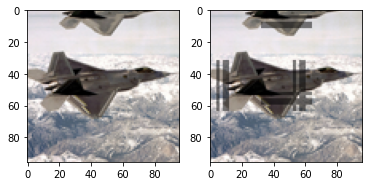

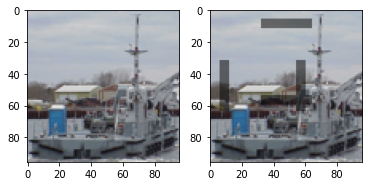

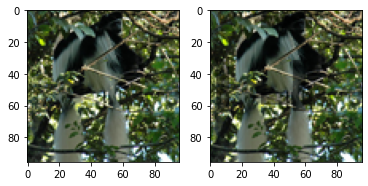

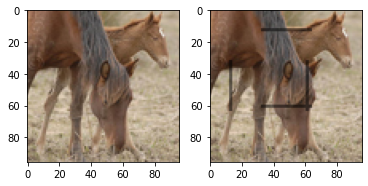

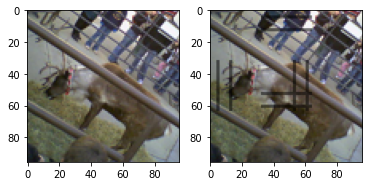

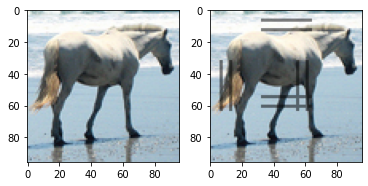

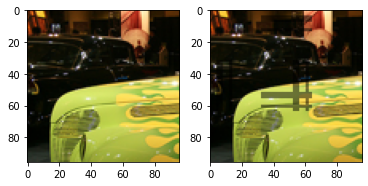

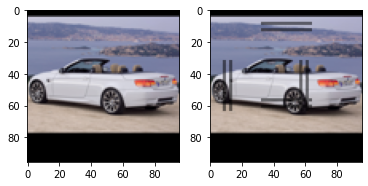

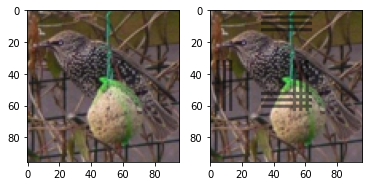

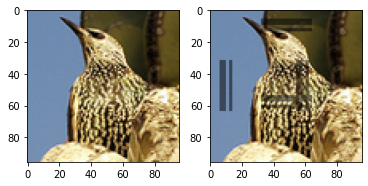

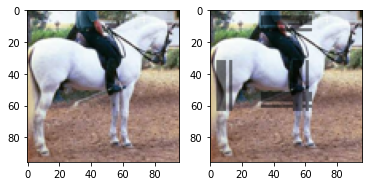

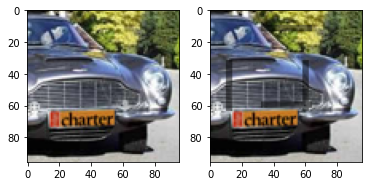

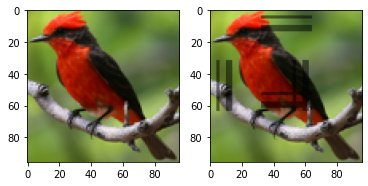

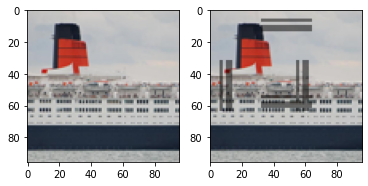

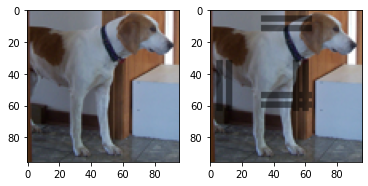

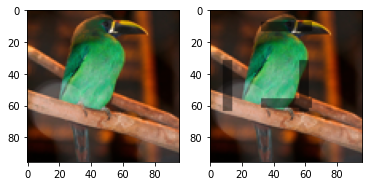

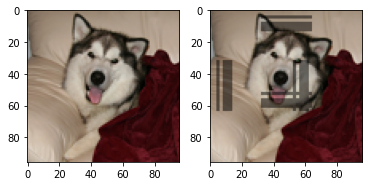

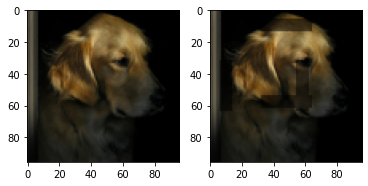

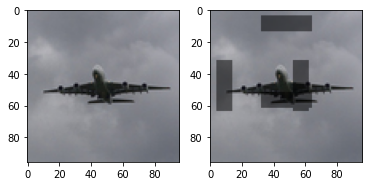

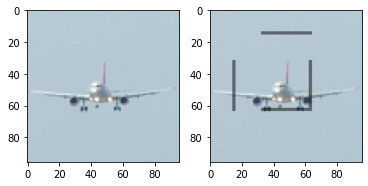

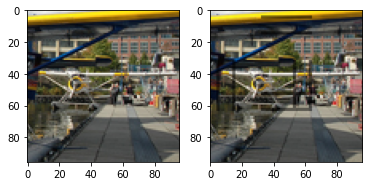

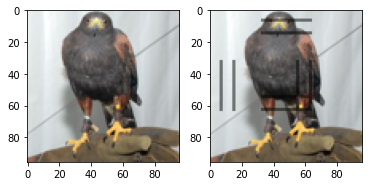

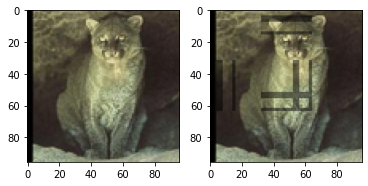

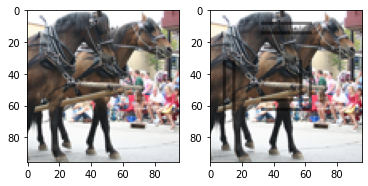

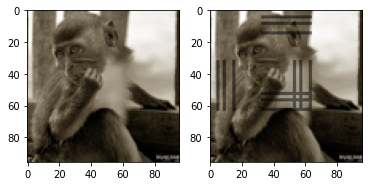

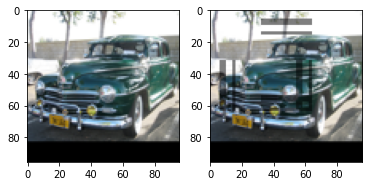

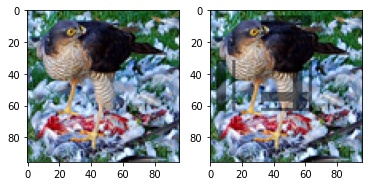

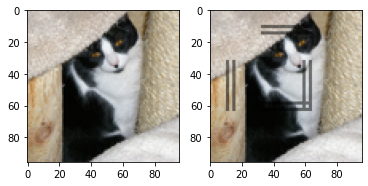

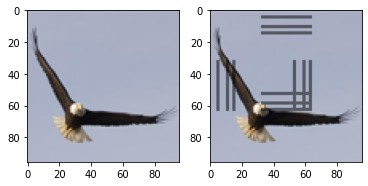

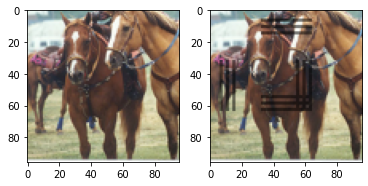

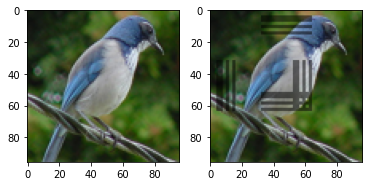

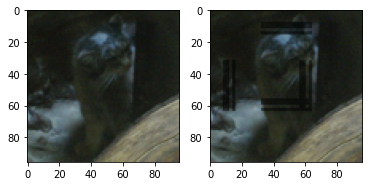

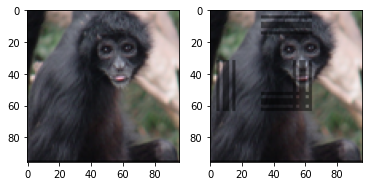

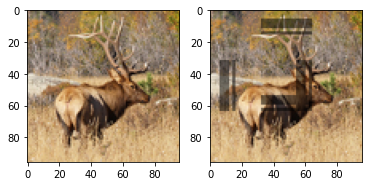

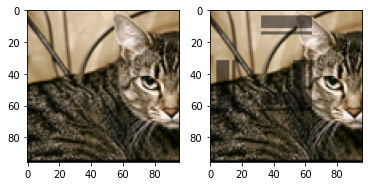

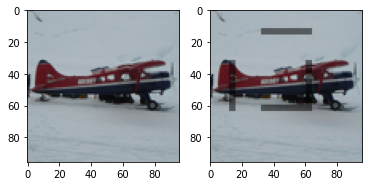

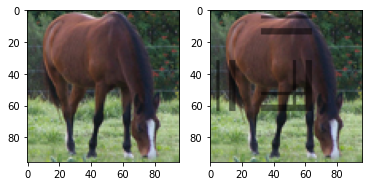

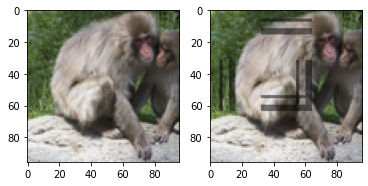

In [16]:
ds_id = STL10_ID(root='./data', split='train+unlabeled', download=True,
             id_type='strip-hv',
             id_weight=0.5,
             strip_len=32)
ds = STL10(root='./data', split='train+unlabeled')

"""
visual
"""
cnt = 0
for (x, y), (x_id, y) in zip(ds, ds_id):
    fig, ax = plt.subplots(1,2)
    ax[0].imshow(x)
    ax[1].imshow(x_id)
    cnt += 1
    if cnt == 50:
        break

In [ ]:
def gen_strip_mask(stamp, size=96, res=2, stride=48):
    N = len(stamp)
    mask = np.ones((size,size), dtype=np.float32)
    for s in range(0, size, stride):
        for i in range(N):
            mask[s+i*res: s+i*res+res, :] *= stamp[i]
            mask[:, s+i*res: s+i*res+res] *= stamp[i]
    return mask

def gen_2d_mask(stamp, size=96, res=5, stride=48):
    assert len(stamp) == 25
    block = np.ones((9,9))
    
    for c in range(25):
        i, j = c // 5, c % 5
        block[4 + i, 4 + j] = stamp[c]
        block[4 - i, 4 + j] = stamp[c]
        block[4 + i, 4 - j] = stamp[c]
        block[4 - i, 4 - j] = stamp[c]
    
    mask = np.ones((size,size), dtype=np.float32)
    for si in range(0, size, stride):
        for sj in range(0, size, stride):
            for i in range(9):
                for j in range(9):
                    mask[si+i*res: si+i*res+res, sj+j*res: sj+j*res+res] = block[i,j]
    return mask


def mask_image(image, mask, weight):
    one = np.ones_like(mask)
    tmp = (one * (1 - weight) + mask * weight)
    return (image.astype(float) * tmp[:,:,None]).astype(image.dtype)

cnt = 1
for x, y in ds:
#     mask = gen_2d_mask((np.random.rand(25) > 0.3).astype(int))
    x = np.asarray(x)
    
    fig, ax = plt.subplots(1,2)
    ax[0].imshow(x)
#     ax[1].imshow(mask_image(x, mask, 0.5))
    
    cnt += 1
    if cnt == 50:
        break